In [479]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer,LabelEncoder
from sklearn.metrics import classification_report
from sklearn import tree

df = pd.read_excel('./Pistachio_16_Features_Dataset.xlsx')
df.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4,Class
0,63391,1568.405,390.3396,236.7461,0.7951,284.0984,0.8665,73160,0.6394,1.6488,0.3238,0.7278,0.0062,0.0037,0.5297,0.8734,Kirmizi_Pistachio
1,68358,1942.187,410.8594,234.7525,0.8207,295.0188,0.8765,77991,0.6772,1.7502,0.2277,0.7181,0.0060,0.0034,0.5156,0.9024,Kirmizi_Pistachio
2,73589,1246.538,452.3630,220.5547,0.8731,306.0987,0.9172,80234,0.7127,2.0510,0.5951,0.6767,0.0061,0.0030,0.4579,0.9391,Kirmizi_Pistachio
3,71106,1445.261,429.5291,216.0765,0.8643,300.8903,0.9589,74153,0.7028,1.9879,0.4278,0.7005,0.0060,0.0030,0.4907,0.9755,Kirmizi_Pistachio
4,80087,1251.524,469.3783,220.9344,0.8823,319.3273,0.9657,82929,0.7459,2.1245,0.6425,0.6803,0.0059,0.0028,0.4628,0.9833,Kirmizi_Pistachio


In [480]:
norm = Normalizer()
X = norm.fit_transform(df[df.select_dtypes('number').columns])

label_encoder = LabelEncoder()
y = pd.Series(label_encoder.fit_transform(df['Class']))

### PCA reduction

In [481]:
from sklearn.decomposition import PCA

pca = PCA(n_components=6)
df_pca = pca.fit_transform(X)
df_pca = pd.DataFrame(df_pca,columns=pca.get_feature_names_out())
df_pca.head()

,pca0,pca1,pca2,pca3,pca4,pca5
0,0.040024,-0.000029,-0.000807,0.000238,-0.000286,-1.788752e-05
1,0.034601,-0.003046,-0.000563,-0.000205,-0.000106,7.112437e-06
2,0.011455,0.001973,-0.000843,0.000551,0.000088,1.927432e-06
3,-0.010375,-0.002661,0.000284,0.000061,-0.000039,3.140551e-06
4,-0.014207,0.000197,0.000143,0.000196,0.000136,2.851668e-07


In [482]:
x_train,x_test,y_train,y_test = train_test_split(df_pca,y,test_size=0.2,random_state=18)

dt_clf = DecisionTreeClassifier(criterion='entropy')
dt_clf.fit(X=x_train,y=y_train)


DecisionTreeClassifier(criterion='entropy')

### F1 Score with default hyperparameters

In [483]:
y_prediction = dt_clf.predict(x_test)

print(classification_report(y_pred=y_prediction,y_true=y_test))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83       223
           1       0.82      0.79      0.81       207

    accuracy                           0.82       430
   macro avg       0.82      0.82      0.82       430
weighted avg       0.82      0.82      0.82       430



### F1 Score with Randomized Search

In [484]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint


param_distrs = {
                'max_depth':randint(low=1,high=100),
                'min_samples_split':randint(low=2,high=100),
                'max_leaf_nodes':randint(low=4,high=8),
                }
rnd_dec = RandomizedSearchCV(dt_clf,param_distrs,n_iter=5,cv=3,error_score='raise')

rnd_dec.fit(x_train,y_train);


y_rnd_pred = rnd_dec.predict(x_test)
print(classification_report(y_pred=y_rnd_pred,y_true=y_test))
print(rnd_dec.best_estimator_)

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       223
           1       0.87      0.83      0.85       207

    accuracy                           0.86       430
   macro avg       0.86      0.86      0.86       430
weighted avg       0.86      0.86      0.86       430

DecisionTreeClassifier(criterion='entropy', max_depth=82, max_leaf_nodes=7,
                       min_samples_split=51)


### Final decision tree

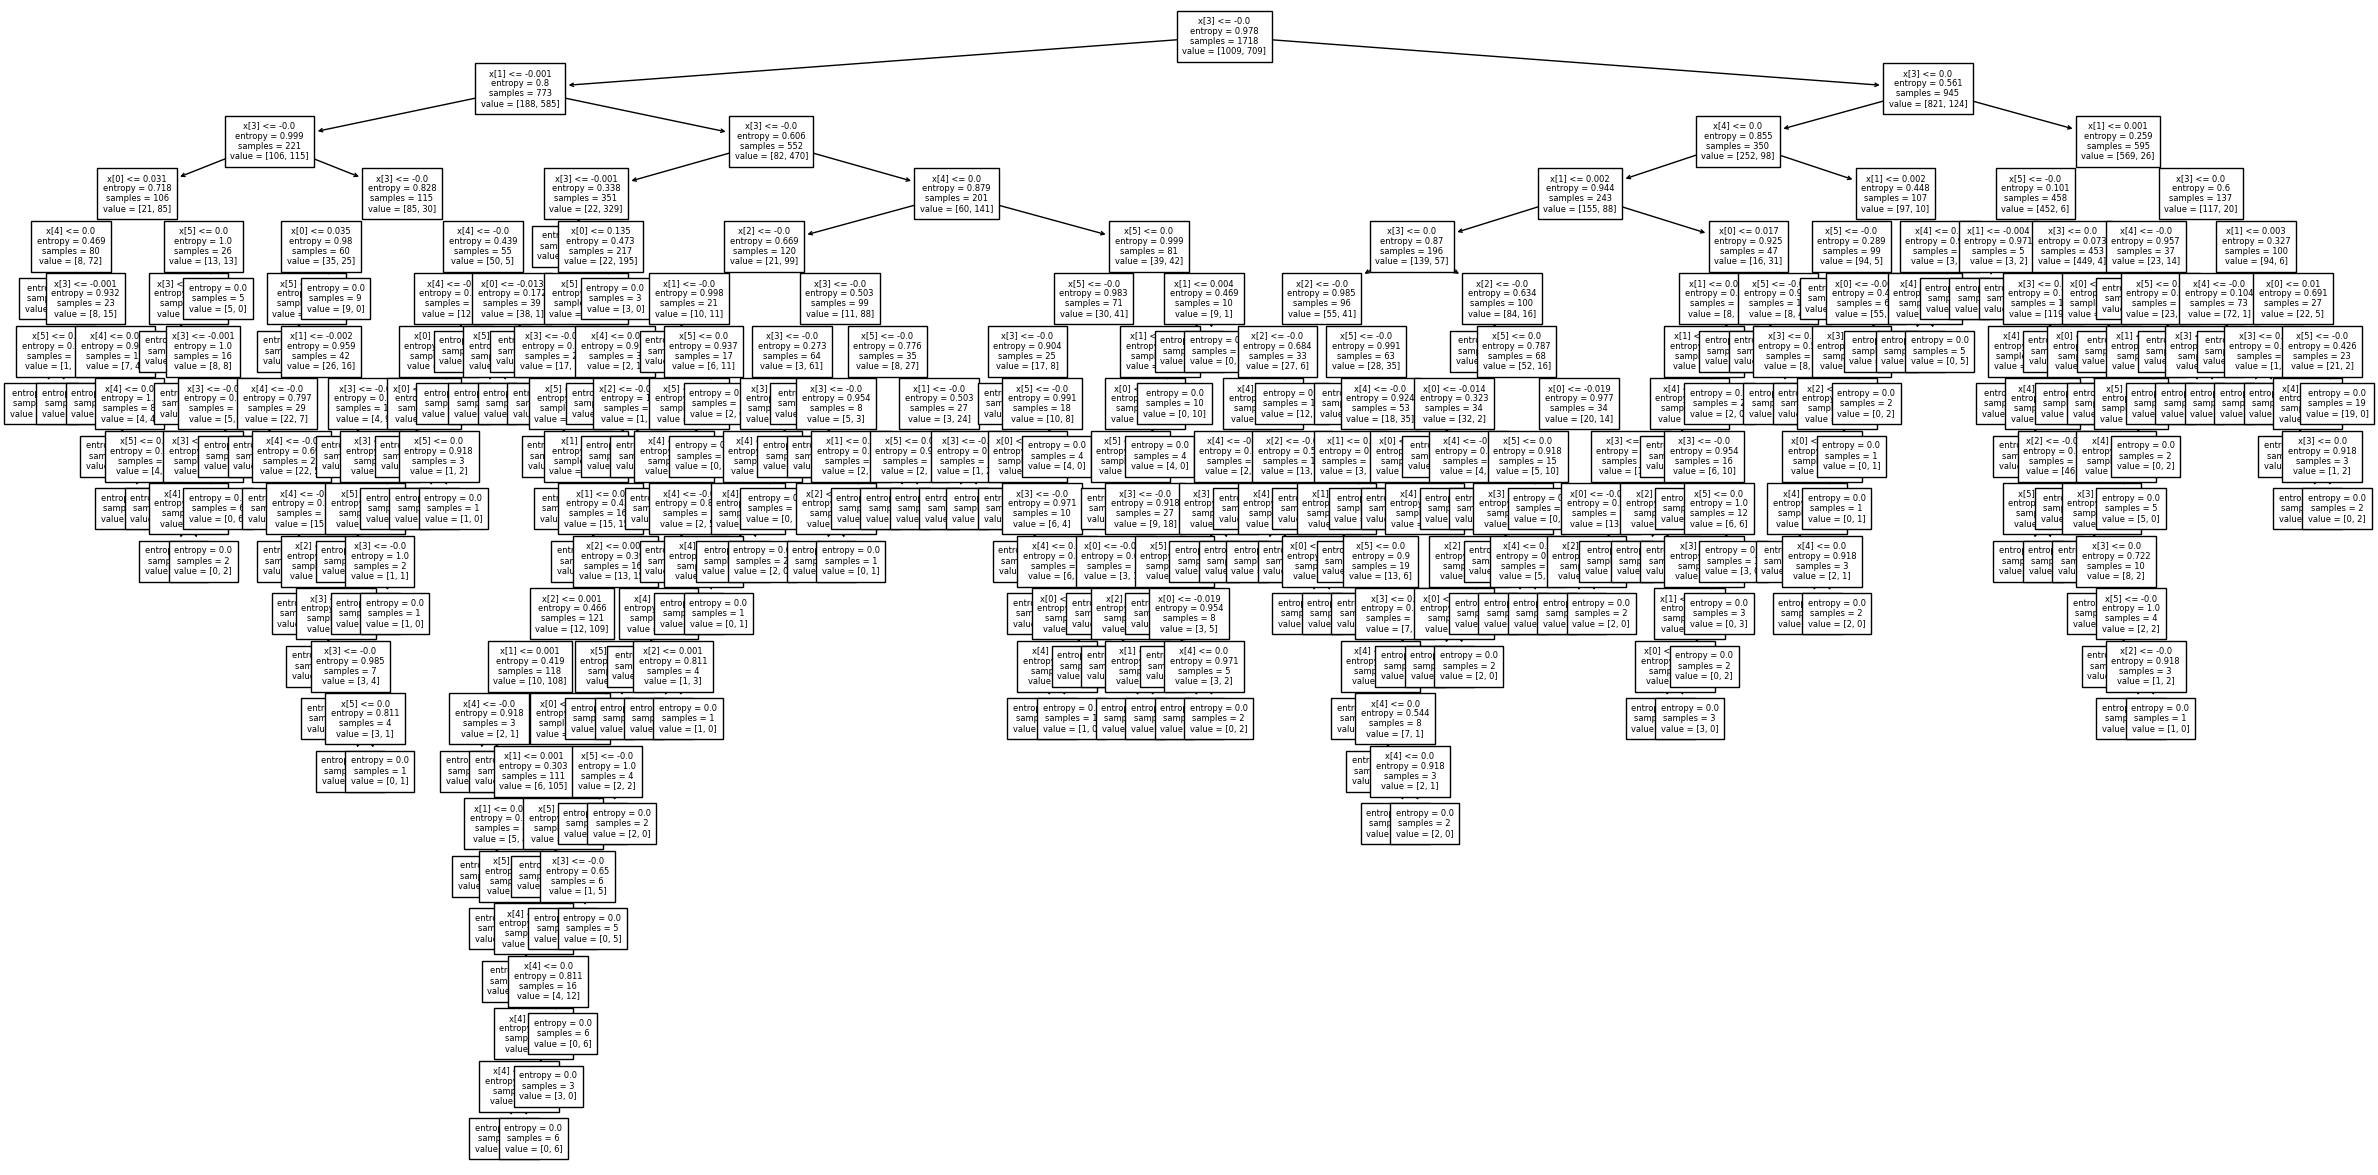

In [485]:
figura,eixos = plt.subplots(nrows=1,ncols=1,figsize=(30,15))
tree.plot_tree(dt_clf,fontsize=6);